In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys, os
root = os.path.join(os.getcwd())
sys.path.append(root)

from matplotlib import pyplot as plt


# LCLS Injector
---

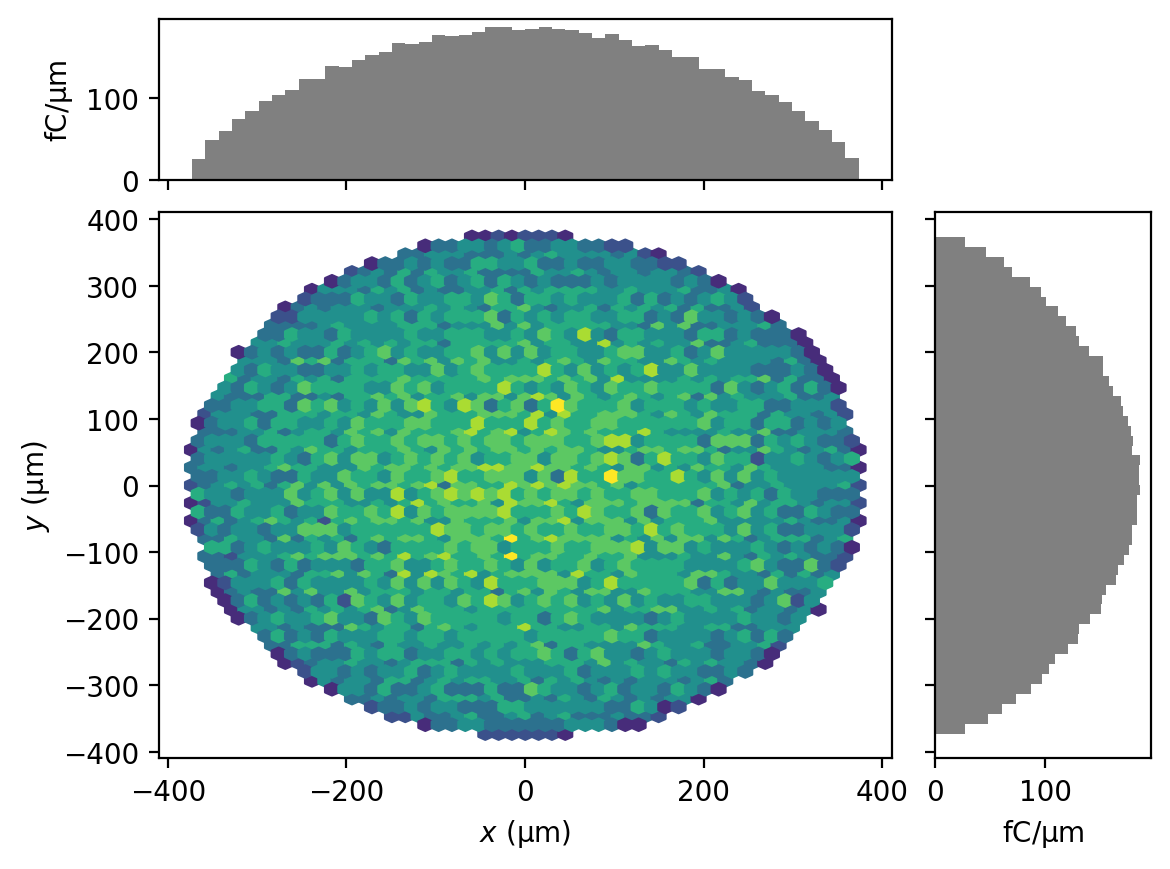

In [2]:
from distgen import Generator

DISTGEN_INPUT_FILE = os.path.join(root, 'templates/srf_injector/distgen.yaml')

gen = Generator(DISTGEN_INPUT_FILE, verbose=0)
gen.run()

gen.particles.plot('x', 'y')

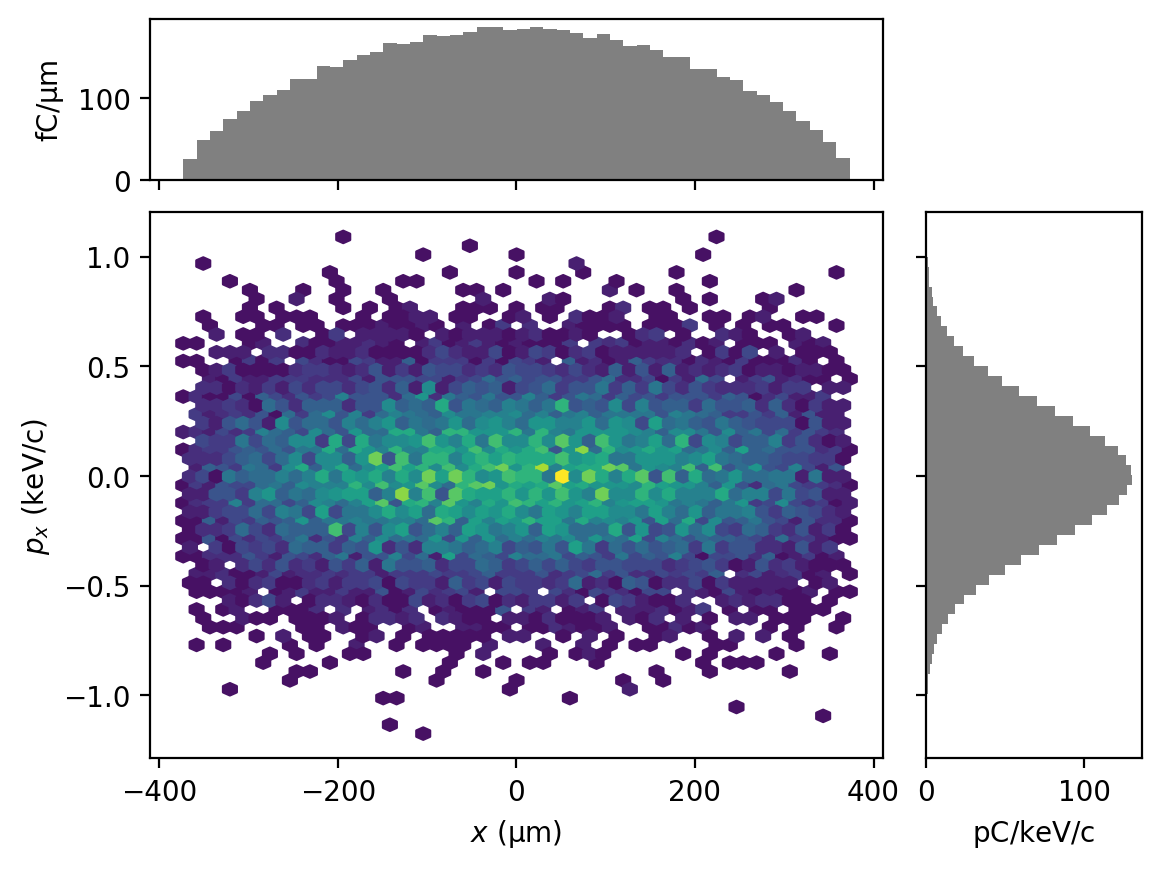

In [3]:
gen.particles.plot('x', 'px')

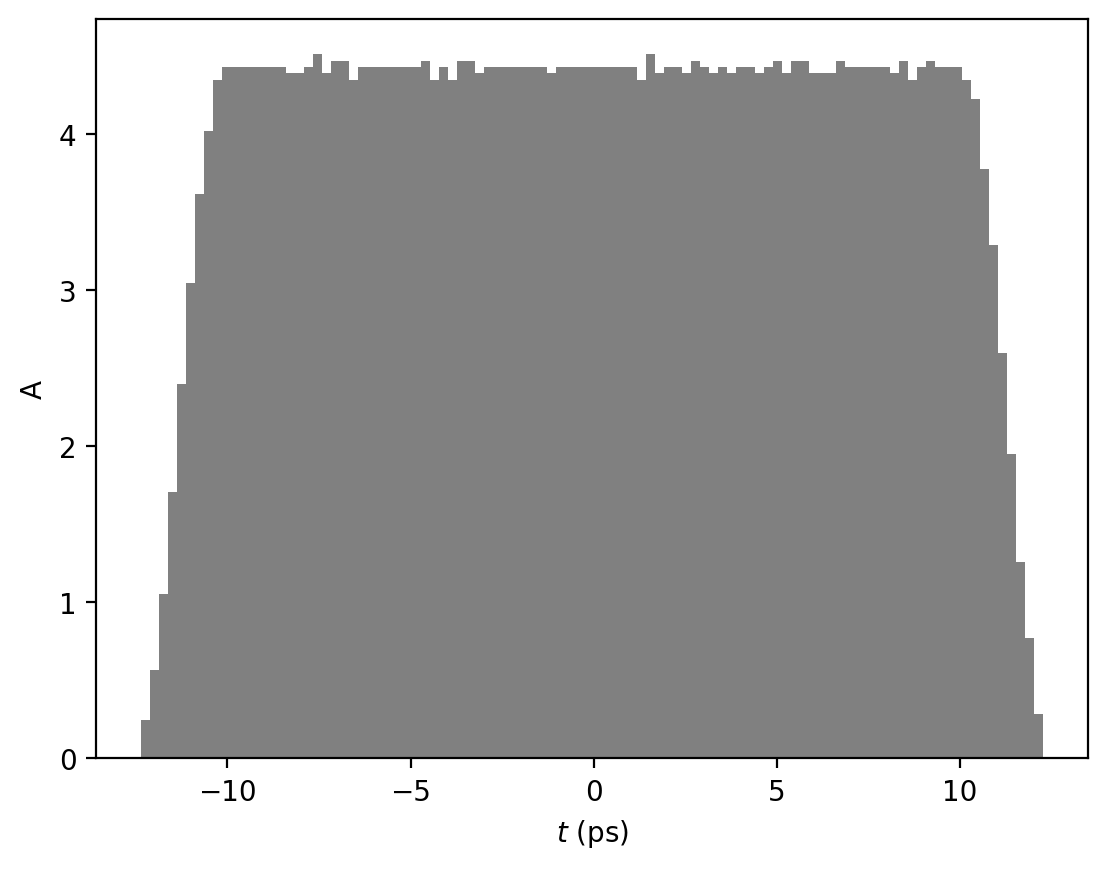

In [4]:
gen.particles.plot('t')

In [5]:
SETTINGS={
    'n_particle':1000,
    'swifel_scale': 30000000.0,
    'swifel_relative_phase': 0,
#    'c91_scale': 13745260.538205162,
#    'c91_relative_phase': -56.64512789009524,
#    'c92_scale': 11946233.551708557,
#    'c92_relative_phase': -6.516777279789954,
#    'c93_scale': 25384865.363246165,
#    'c93_relative_phase': 31.090015374312785,
#    'c94_scale': 12152605.998968443,
#    'c94_relative_phase': 1.3181929346671777,
#    'c95_scale': 8918661.237543773,
#    'c95_relative_phase': 4.403450504818665,
#    'c96_scale': 32000000.0,
#    'c96_relative_phase': 0,
#    'c97_scale': 32000000.0,
#    'c97_relative_phase': 0,
#    'c98_scale': 32000000.0,
#    'c98_relative_phase': 0,
#    'c99_scale': 32000000.0,
#    'c99_relative_phase': 0,
#    'sol1_scale': 0.2045, #0.2019127932695301,
#    'sol12_scale': 0.15864417339413103,
    'space_charge':0,
    'cathode':0
}

In [6]:
SETTINGS['Ntout']=500
SETTINGS['tmax']=100e-9
SETTINGS['ZSTOP']=20

from gpt.gpt_distgen import run_gpt_with_distgen

GPT_INPUT_FILE = os.path.join(root, 'templates/srf_injector/gpt.in')

print(GPT_INPUT_FILE)

G = run_gpt_with_distgen(SETTINGS,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=True,
                         auto_phase=True,
                         #workdir='temp',
                         #use_tempdir=False,
                         timeout=6000
                        )

#G.archive()

/Users/colwyngulliford/GitHub/lume-gpt/examples/templates/srf_injector/gpt.in
Run GPT with Distgen:
n_particle is in distgen
Replacing param n_particle with value 1000
swifel_scale is in gpt
swifel_relative_phase is in gpt
space_charge is in gpt
cathode is in gpt
Ntout is in gpt
tmax is in gpt
ZSTOP is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.

Distgen >------

Distribution format: gpt
Output file: /var/folders/w8/8n1md1352pzd3nqp0lhc5jy00000gn/T/tmpxdtdlm0z/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 100 pC.
   Number of macroparticles: 1000.
   Assuming cylindrical symmetry...
   r distribution: radial Gaussian
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Tukey
      length = 25.1243 ps, ratio = 0.2
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 306.633 eV/c
   py distribution: Gaussian
      a

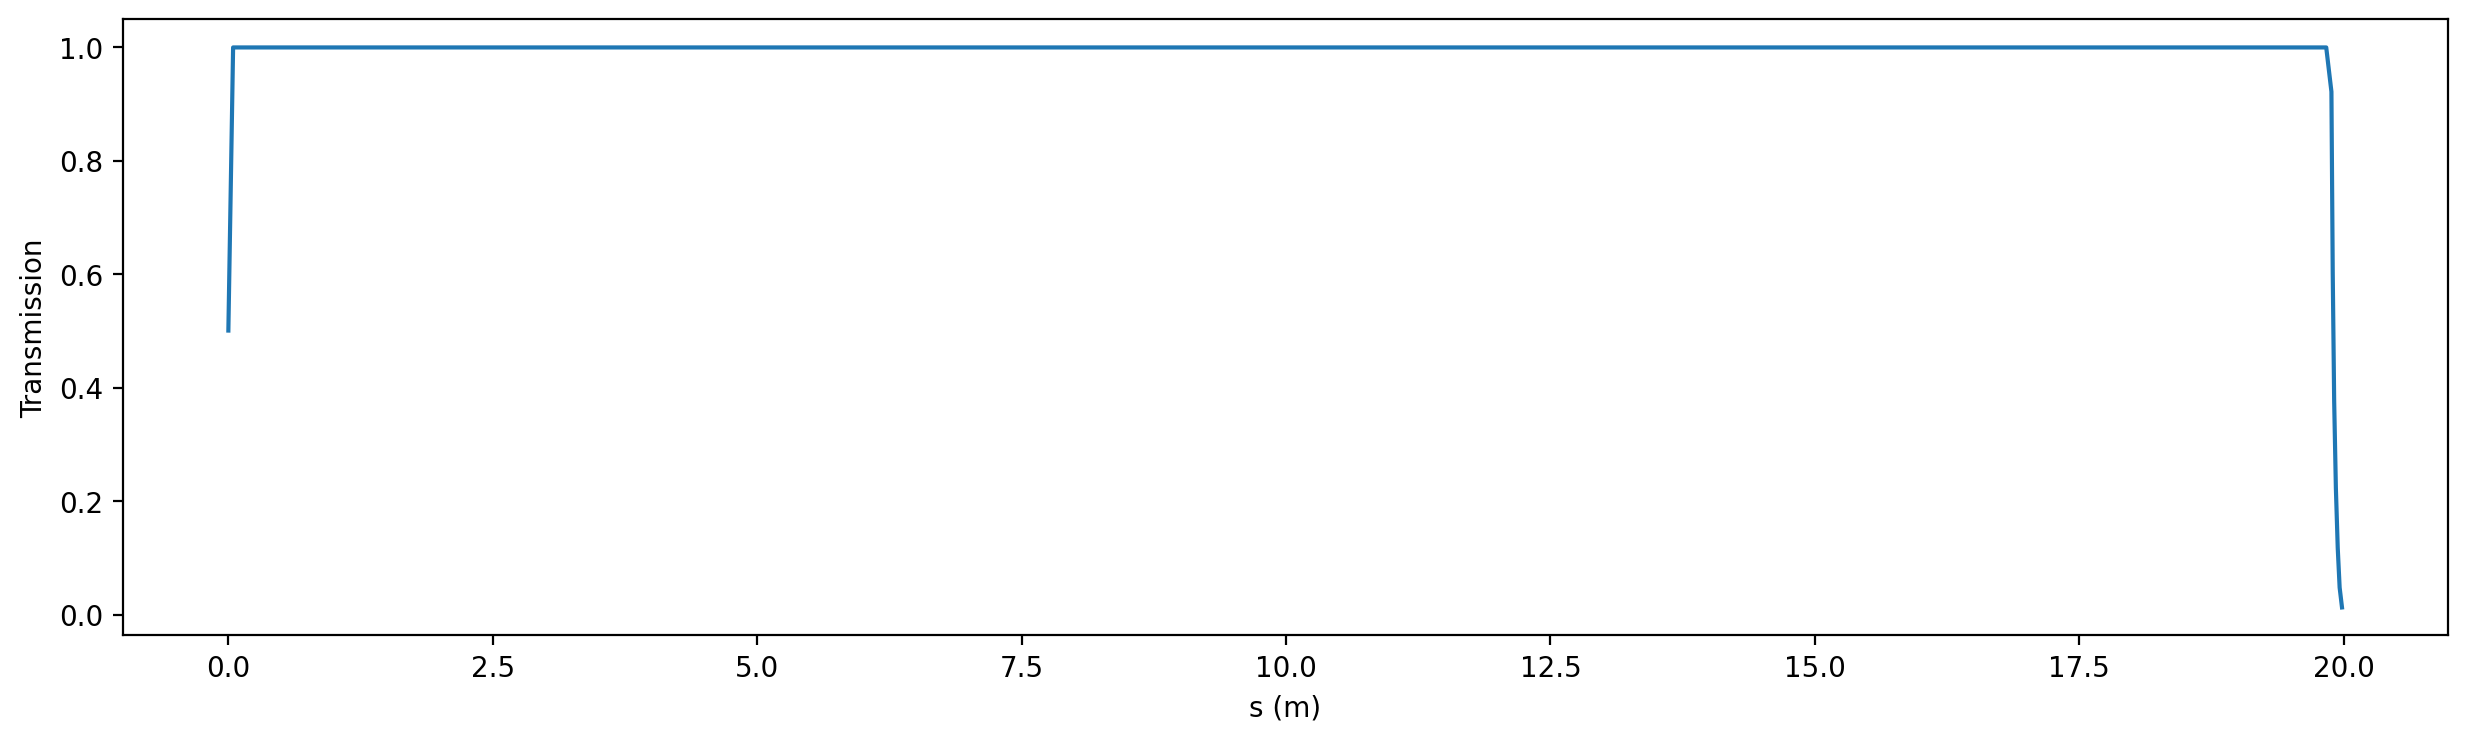

In [7]:
N = [len(tout['x'])/SETTINGS['n_particle'] for tout in G.tout]

plt.figure(figsize=(15,4))
plt.plot(G.tout_stat('mean_z'), N); 
plt.xlabel('s (m)');
plt.ylabel('Transmission');

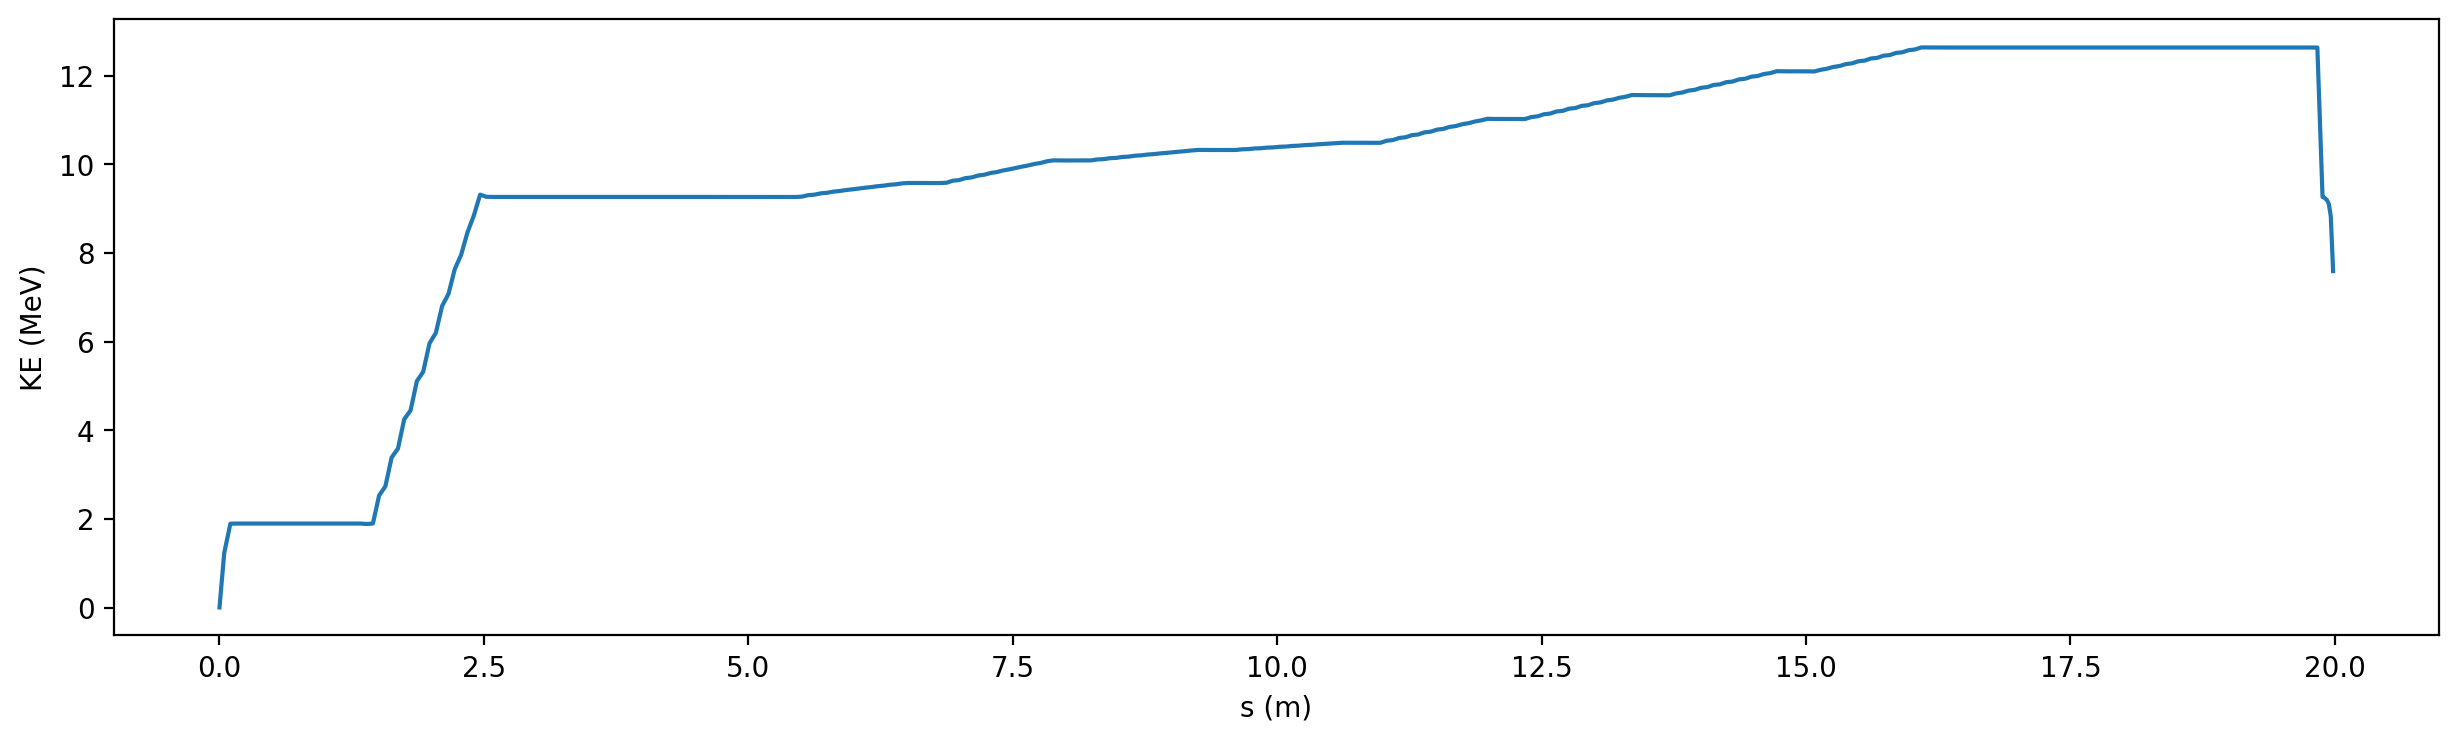

In [8]:
plt.figure(figsize=(15,4))
plt.plot(G.tout_stat('mean_z'), G.tout_stat('mean_kinetic_energy')/1e6); 
plt.xlabel('s (m)');
plt.ylabel('KE (MeV)');

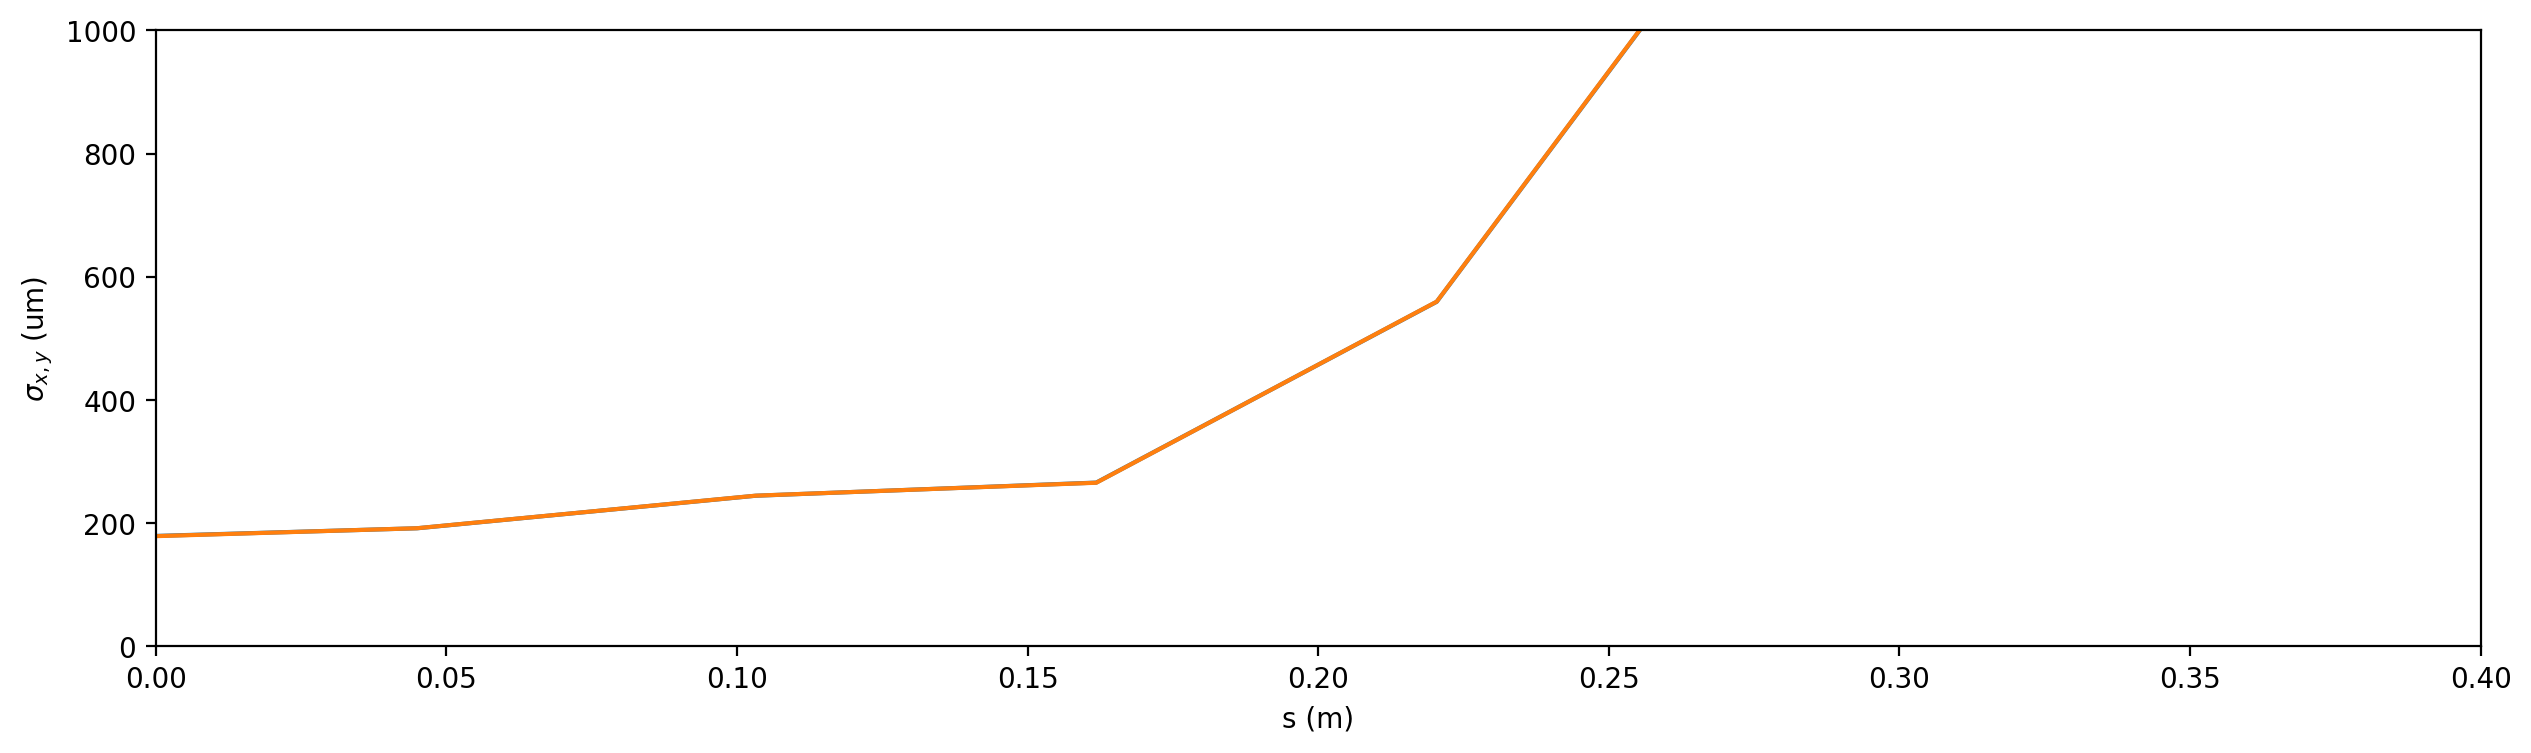

In [9]:
plt.figure(figsize=(15,4))
plt.plot(G.s_ccs, G.tout_ccs_stat('sigma_x')*1e6, 'tab:blue');
plt.plot(G.s_ccs, G.tout_ccs_stat('sigma_y')*1e6, 'tab:orange');
plt.xlabel('s (m)')
plt.ylabel(r'$\sigma_{x,y}$ (um)');
plt.xlim([0, 0.4]);
plt.ylim([0, 1000]);